

This notebook cotains code for generating the PCA's presented in the manuscript (Fig's 3 & 5)



In [ ]:
library("ggplot2")
library("ggfortify")
library("FactoMineR")
library("factoextra")
library("dplyr")
library("cluster")

In [4]:
#Read in allele frequency matrix and add columns corresponding to larval bucket replicate (LB), sample ID, Day, and treatment
all_data <- read.csv("../Data/LarvalPopulations_AlleleFrequencyMatrix.csv")
LB = c("LB3", "LB9", "LB3", "LB10", "LB9", "LB8", "LB5", "LB11", "LB5", "Ambient", "LB2", "LB10", "LB11", "LB12", "LB2", "Embryos", "LB7", "Small_LB1", "Small_LB6", "LB8", "Large_LB1", "Large_LB6")
LB = as.data.frame(LB)
Sample = c("Day26_Low", "Slowest Growers", "Settled_Low", "Settled_Ambient", "Fastest Growers", "Settled_Low", "Settled_Ambient", "Fastest Growers", "Day26_Ambient", "Day 6 Population", "Settled_Low", "Day26_Ambient", "Slowest Growers", "Day26_Ambient", "Day26_Low", "Day 0 Population", "Day 6 Population", "Slowest Growers", "Slowest Growers", "Day26_Low", "Fastest Growers", "Fastest Growers")
Sample = as.data.frame(Sample)
Day = c("26", "6", "43", "43", "6", "43", "43", "6", "26", "6", "43", "26", "6", "26", "26", "0", "6", "6", "6", "26", "6", "6")
Day = as.data.frame(Day)
Treatment = c("Low", "Low", "Low", "Ambient", "Low", "Low", "Ambient", "Ambient", "Ambient", "Ambient", "Low", "Ambient", "Ambient", "Ambient", "Low", "Ambient", "Low", "Low", "Ambient", "Low", "Low", "Ambient")
Treatment = as.data.frame(Treatment)


all_data <- all_data[,-1]
all_data <- na.omit(all_data)
all_data <-t(all_data)
rownames(all_data) <- c()

all_data <- cbind(LB, Sample, Treatment, Day, all_data)

Saving 7 x 7 in image


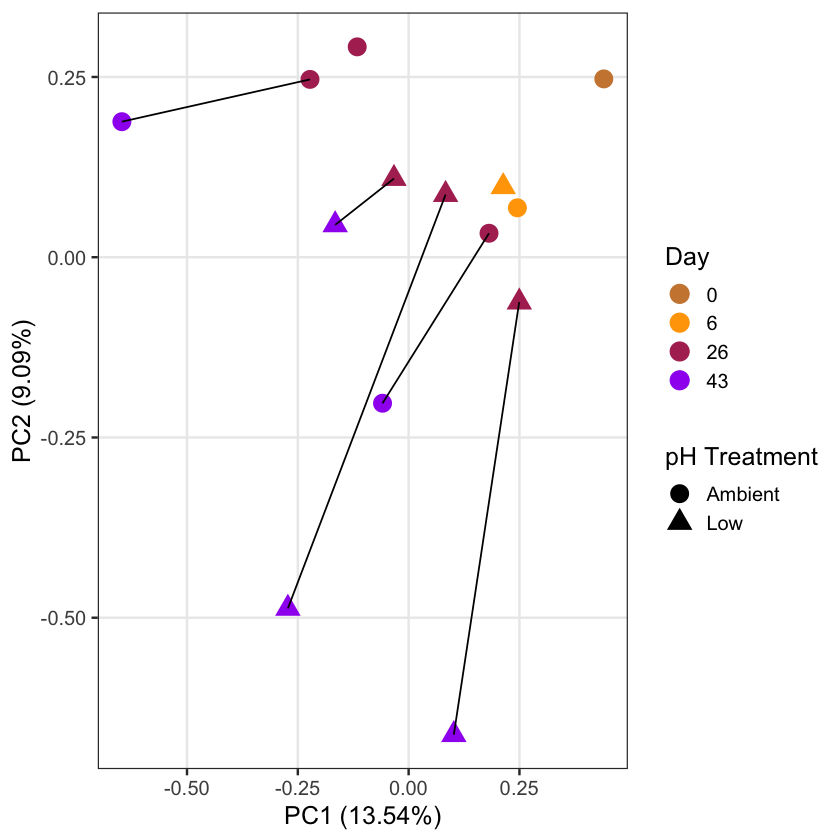

In [5]:
#Run pca on larval population samples (no size-separated larval groups)
#first, subset all_data
fulldist_data <- all_data[-c(2, 5, 8, 13, 18, 19, 21, 22),]
#then, isolate AF's
fulldist_af <- fulldist_data[,5:ncol(fulldist_data)]
#scale data
fulldist_af <- scale(fulldist_af, scale = TRUE)

#plot pca
pca_res = prcomp(t(fulldist_af))

pca_df = as.data.frame(pca_res$rotation)
pca_df$Treatment = fulldist_data$Treatment
pca_df$Day = fulldist_data$Day
pca_df$LB = fulldist_data$LB
fulldist_pca = ggplot(pca_df, aes(x=PC1, y=PC2, color=factor(Day, levels=c("0", "6", "26", "43")), shape= Treatment, group = LB)) + 
    geom_point(size = 5) +
    geom_line(colour="black") +
    labs(color="Day", shape="pH Treatment") +
    scale_colour_manual(values = c("Peru", "Orange", "Maroon", "Purple")) +
    theme_bw(base_size = 15) +
    xlab("PC1 (13.54%)") +
    ylab("PC2 (9.09%)") +
    theme(panel.grid.minor = element_blank())

fulldist_pca + ggsave("~/Dropbox/U Chicago/Projects/France/DataAnalysis_Figures/PE3_Figures/FullDist_pca.pdf")



Saving 7 x 7 in image


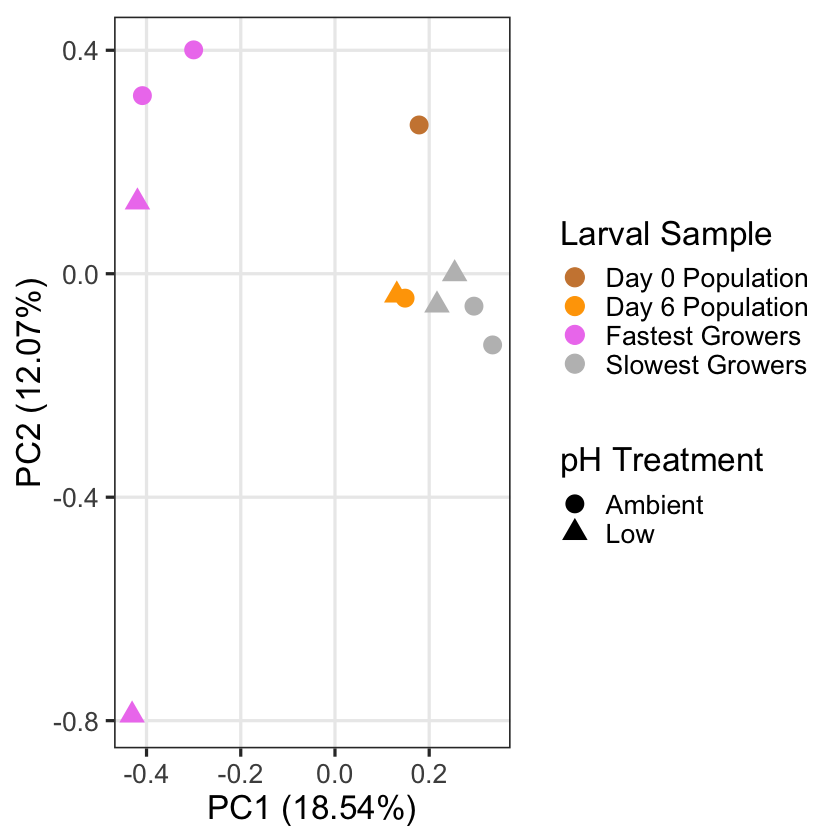

In [4]:
#Run pca on Day 6 samples and embryos
#first, subset all_data
day6_data <- all_data[-c(1, 3, 4, 6, 7, 9, 11, 12, 14, 15, 20),]
#Isolate AF's
day6_af <- day6_data[,5:ncol(fulldist_data)]
#Scale data
day6_af <- scale(day6_af, scale = TRUE)

#plot pca
pca_res = prcomp(t(day6_af))

pca_df = as.data.frame(pca_res$rotation)
pca_df$Sample = day6_data$Sample
pca_df$Treatment = day6_data$Treatment

day6_pca = ggplot(pca_df, aes(x=PC1, y=PC2, color=factor(Sample, levels=c("Day 0 Population", "Day 6 Population", "Fastest Growers", "Slowest Growers")), shape=Treatment)) + 
    geom_point(size = 5) +
    labs(color="Larval Sample", shape="pH Treatment") +
    scale_colour_manual(values = c("Peru", "Orange", "Violet", "Grey")) +
    theme_bw(base_size = 20) +
    xlab("PC1 (18.54%)") +
    ylab("PC2 (12.07%)") +
    theme(panel.grid.minor = element_blank())
day6_pca + ggsave("~/Dropbox/U Chicago/Projects/France/DataAnalysis_Figures/PE3_Figures/Day6_pca.pdf")

